In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
with open('../../map_400_fixed.npy', 'rb') as f:
    map_data = np.load(f)

In [5]:
from new_map_N10 import reference, path

(0.19649999999999995,
 2.2535000000000003,
 0.4444999999999999,
 3.2055000000000002)

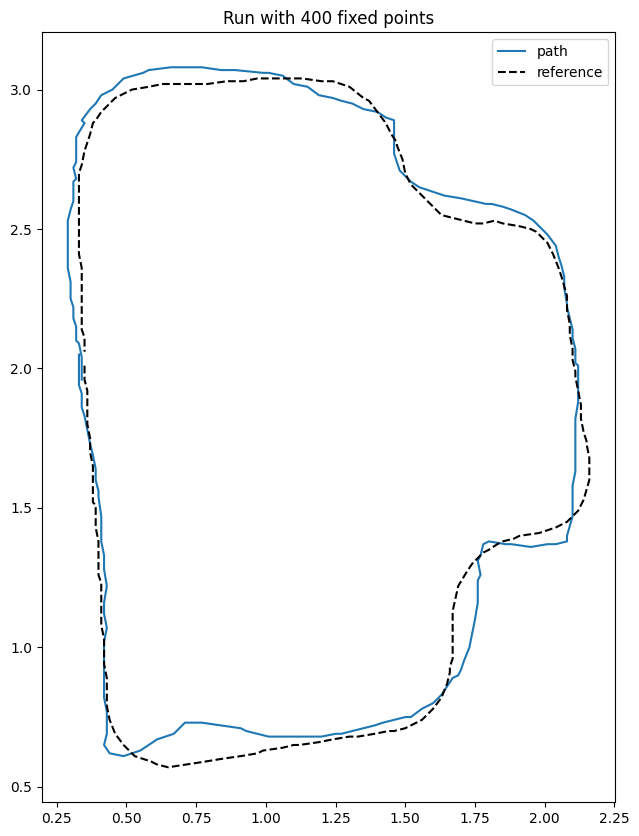

In [6]:
path = np.array(path)
reference = np.array(reference)

plt.plot(*np.array(path)[:-10, :2].T, label='path')
plt.plot(*np.array(reference)[:, :2, 0].T, 'k--', label='reference')
plt.legend()
plt.title("Run with 400 fixed points")
plt.gcf().set_size_inches(10, 10)
plt.axis('scaled')

Text(0.5, 1.0, 'Error on x')

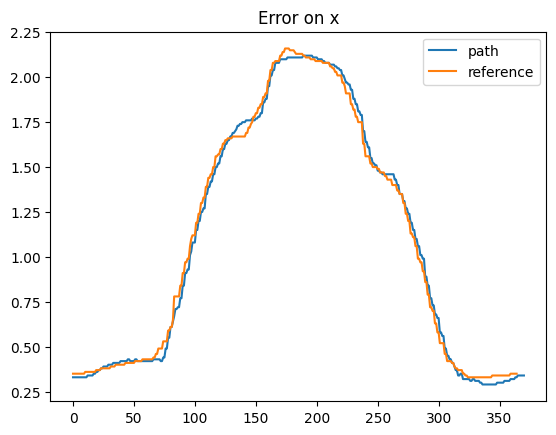

In [7]:
plt.plot(path[:-10, 0], label='path')
plt.plot(reference[:, 0, 0], label='reference')
plt.legend()
plt.title("Error on x")

Text(0.5, 1.0, 'Error on y')

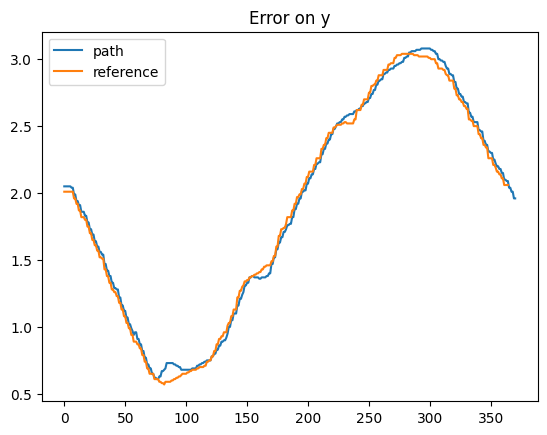

In [8]:
plt.plot(path[:-10, 1], label='path')
plt.plot(reference[:, 1, 0], label='reference')
plt.legend()
plt.title("Error on y")

Text(0.5, 1.0, 'Error on theta')

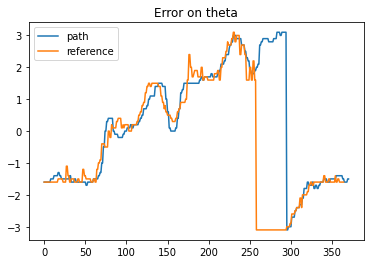

In [7]:
plt.plot(path[:-10, 2], label='path')
plt.plot(reference[:, 2, 0], label='reference')
plt.legend()
plt.title("Error on theta")

In [8]:
from N10_new_map_test2 import reference, path

Text(0.5, 1.0, 'Run LMPC')

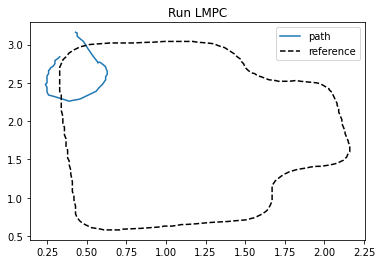

In [9]:
path = np.array(path)
reference = np.array(reference)

plt.plot(*np.array(path)[-100:, :2].T, label='path')
plt.plot(*np.array(reference)[:, :2, 0].T, 'k--', label='reference')
plt.legend()
plt.title("Run LMPC")

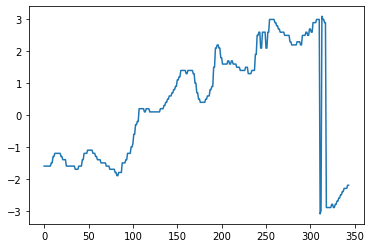

In [10]:
plt.plot(path[:-100, 2])

In [11]:
from X_log import X_log

In [12]:
X_log = np.array(X_log)

In [13]:
all_points = X_log
first_loop_len = all_points.shape[1]
all_points = np.vstack((all_points, np.arange(first_loop_len)[::-1]))

In [14]:
first_loop_len

239

In [15]:
all_points.shape

(6, 239)

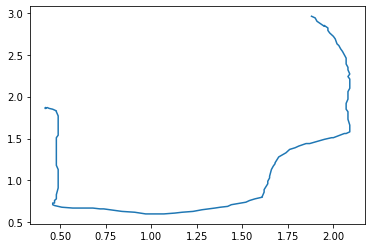

In [16]:
plt.plot(*X_log[:2])

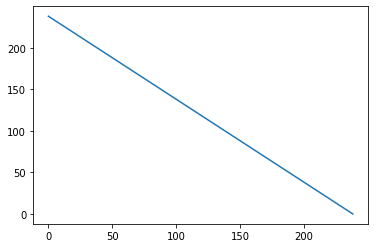

In [17]:
plt.plot(all_points[-1])

In [18]:
idx = 10
N = 3

In [19]:
if idx+N > all_points.shape[1]:
    idx = all_points.shape[1] - idx

In [20]:
i_j = 3

In [21]:
last_iterations = np.hstack([all_points]*i_j)

In [22]:
all_points.shape

(6, 239)

In [23]:
last_iterations.shape

(6, 717)

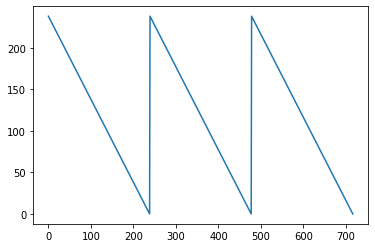

In [24]:
plt.plot(last_iterations[-1])

In [25]:
last_loop = X_log
last_points = X_log

In [26]:
last_points = np.vstack((last_points, np.arange(last_points.shape[1])[::-1]))

In [27]:
last_points.shape

(6, 239)

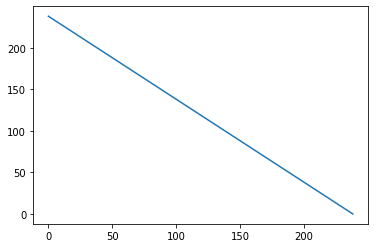

In [28]:
plt.plot(last_points[-1])

In [29]:
_, indices = np.unique(last_points[:-1], axis=1, return_index=True)
sorted_indices = list(sorted(indices))
last_points = last_points[:, sorted_indices]

In [30]:
last_points.shape

(6, 125)

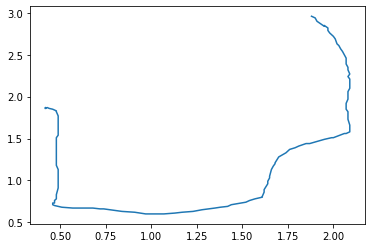

In [31]:
plt.plot(*last_points[:2])

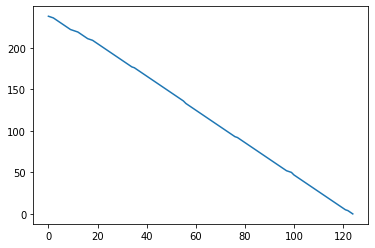

In [32]:
plt.plot(last_points[-1])

In [33]:
MPC_TIME = 0.1

In [34]:
from scipy import spatial

In [35]:
kdtree = spatial.KDTree(last_loop[:2, :int((1/MPC_TIME)*10)].T)

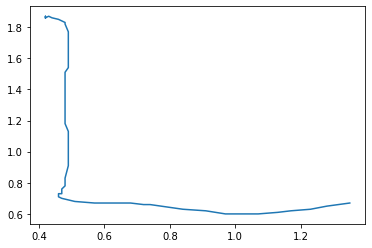

In [36]:
plt.plot(*last_loop[:2, :int((1/MPC_TIME)*10)])

In [37]:
_,idx = kdtree.query([0.45, 1.6], k=2)

In [38]:
idx = max(idx) if (min(idx) != 0 or max(idx) == 1) else 0
idx = (idx+1) % 300

In [39]:
idx

25

In [40]:
all_points.shape

(6, 239)

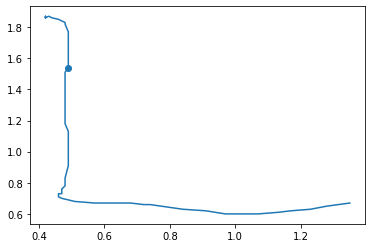

In [41]:
plt.plot(*last_loop[:2, :int((1/MPC_TIME)*10)])
plt.scatter(*last_loop[:2, idx])

In [42]:
K = 7

In [43]:
last_iterations_filtered = last_iterations[np.vstack([last_iterations[-1] > 150]*6)].reshape(6,-1)

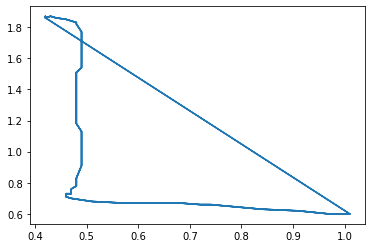

In [44]:
plt.plot(*last_iterations_filtered[:2,:])

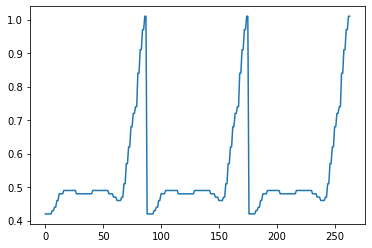

In [45]:
plt.plot(last_iterations_filtered[0,:])

In [46]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=K*i_j, algorithm='ball_tree').fit(last_iterations_filtered[:2].T)

In [47]:
distances, indices = nbrs.kneighbors([last_loop[:2, (idx+N)%last_loop.shape[1]].T])

In [48]:
indices = indices.reshape(-1)
indices

array([ 28, 116, 204, 203,  27, 115, 206, 118, 205,  30,  29, 117,  26,
       202, 201,  25, 113, 114, 207,  32, 120])

In [49]:
last_iterations_filtered[:2, indices]

array([[0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48,
        0.48, 0.49, 0.49, 0.49, 0.49, 0.49, 0.49, 0.48, 0.48, 0.48],
       [1.48, 1.48, 1.48, 1.51, 1.51, 1.51, 1.43, 1.43, 1.43, 1.43, 1.43,
        1.43, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.38, 1.38, 1.38]])

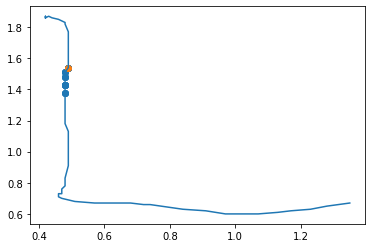

In [50]:
plt.plot(*last_loop[:2, :int((1/MPC_TIME)*10)])
plt.scatter(*last_iterations_filtered[:2, indices])
plt.scatter(*last_loop[:2, idx])

In [51]:
np.around(0.1234, 1)

0.1

In [52]:
from LMPC_fix_idx import path

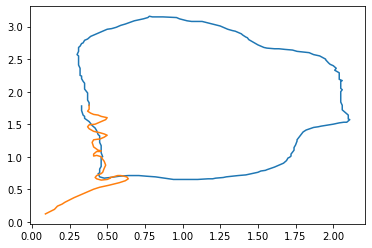

In [53]:
path = np.array(path)
plt.plot(*path[:-130, :2].T)
plt.plot(*path[-130:, :2].T)

In [54]:
path = np.array(path)

In [55]:
from lmpc_first__worked import path
path = np.array(path)

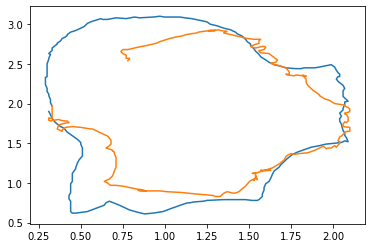

In [56]:
plt.plot(*path[:380, :2].T)
plt.plot(*path[380:, :2].T)

In [57]:
from slack1e1 import slack

In [58]:
slack = np.array(slack)
slack= slack.reshape(-1, 6)
slack.shape

(250, 6)

Text(0.5, 1.0, 'Slack on x')

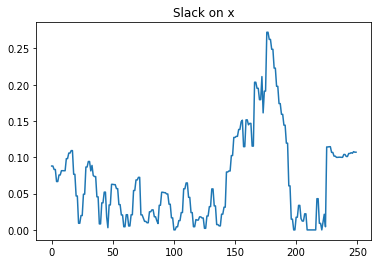

In [59]:
plt.plot(slack[:, 0])
plt.title("Slack on x")

Text(0.5, 1.0, 'Slack on y')

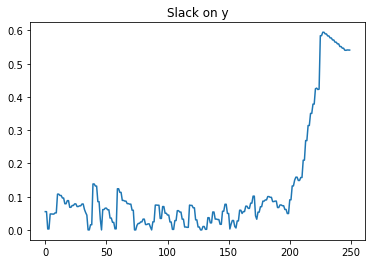

In [60]:
plt.plot(slack[:, 1])
plt.title("Slack on y")

Text(0.5, 1.0, 'Slack on theta')

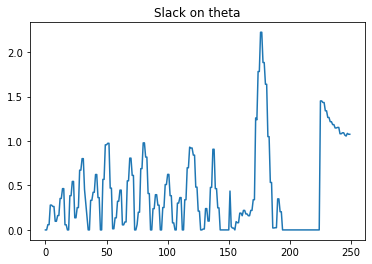

In [61]:
plt.plot(slack[:, 2])
plt.title("Slack on theta")

Text(0.5, 1.0, 'Slack on v')

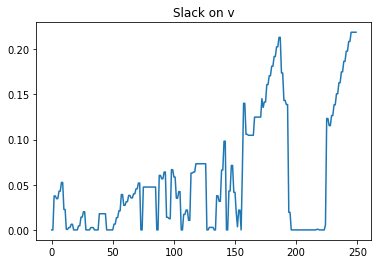

In [62]:
plt.plot(slack[:, 3])
plt.title("Slack on v")

Text(0.5, 1.0, 'Slack on w')

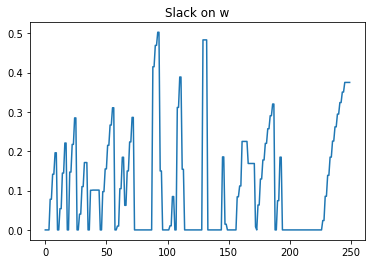

In [63]:
plt.plot(slack[:, 4])
plt.title("Slack on w")

Text(0.5, 1.0, 'Slack on lambda')

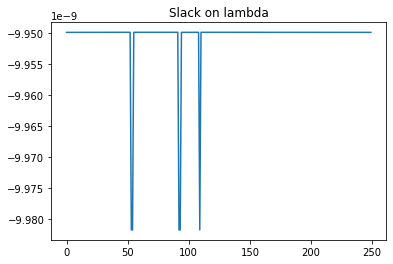

In [64]:
plt.plot(slack[:, 5])
plt.title("Slack on lambda")

In [65]:
from slack1e1 import path

In [66]:
path = np.array(path)

(0.22049999999999997, 2.1895000000000002, 0.06849999999999998, 3.1815)

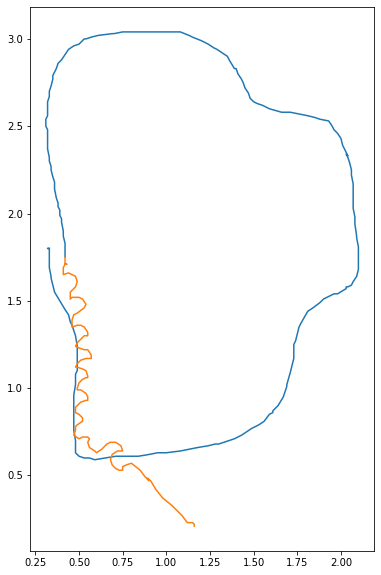

In [67]:
plt.plot(*path[:375, :2].T)
plt.plot(*path[375:, :2].T)
plt.gcf().set_size_inches(10, 10)
plt.axis('scaled')

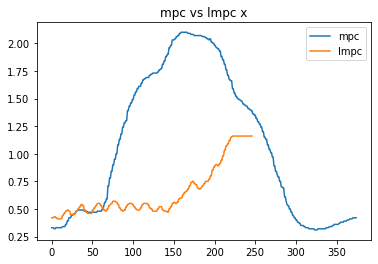

In [68]:
plt.plot(path[:375, 0], label="mpc")
plt.plot(path[375:, 0], label="lmpc")
plt.title("mpc vs lmpc x")
plt.legend()

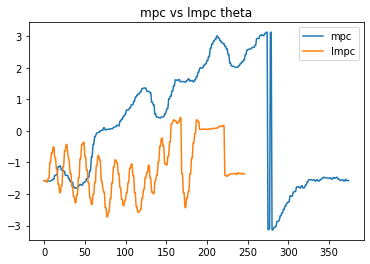

In [69]:
plt.plot(path[:375, 2], label="mpc")
plt.plot(path[375:, 2], label="lmpc")
plt.title("mpc vs lmpc theta")
plt.legend()

In [70]:
from lmpc_reference_shaky import reference, path

(0.1745, 2.2755, 0.3374999999999999, 3.2525)

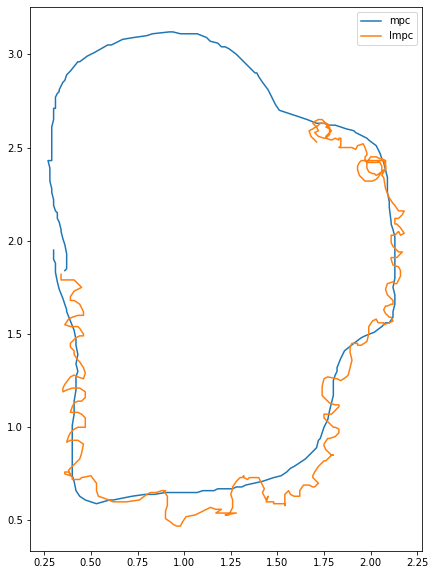

In [71]:
path = np.array(path)
plt.plot(*path[:370, :2].T, label="mpc")
plt.plot(*path[370:, :2].T, label="lmpc")
plt.legend()
plt.gcf().set_size_inches(10, 10)
plt.axis('scaled')

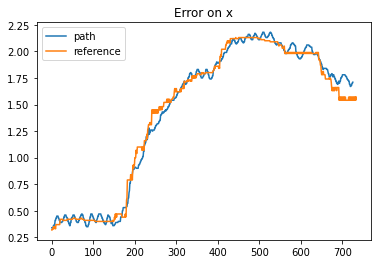

In [72]:
reference = np.array(reference)
plt.plot(path[370:, 0], label="path")
plt.plot(reference[:, 0], label="reference")
plt.title("Error on x")
plt.legend()

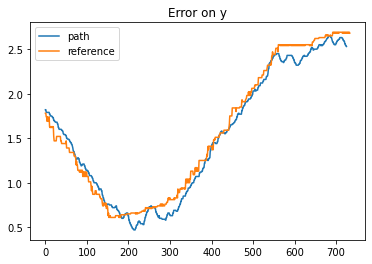

In [73]:
plt.plot(path[370:, 1], label="path")
plt.plot(reference[:, 1], label="reference")
plt.title("Error on y")
plt.legend()

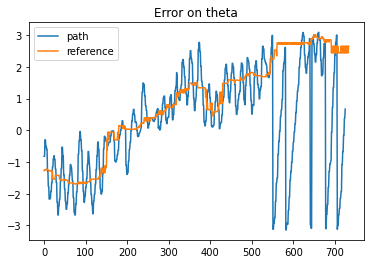

In [74]:
plt.plot(path[370:, 2], label="path")
plt.plot(reference[:, 2], label="reference")
plt.title("Error on theta")
plt.legend()

In [75]:
from no_orientation import reference, path

In [76]:
path = np.array(path)
reference = np.array(reference)

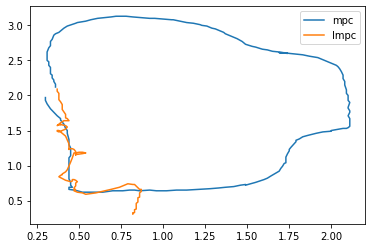

In [77]:
plt.plot(*path[:380, :2].T, label="mpc")
plt.plot(*path[380:, :2].T, label="lmpc")
plt.legend()

Text(0.5, 1.0, 'mpc vs lmpc x')

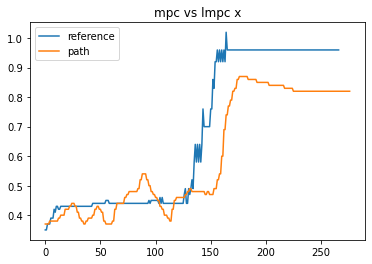

In [78]:
plt.plot(reference[:, 0], label="reference")
plt.plot(path[380:, 0], label="path")
plt.legend()
plt.title("mpc vs lmpc x")

Text(0.5, 1.0, 'mpc vs lmpc y')

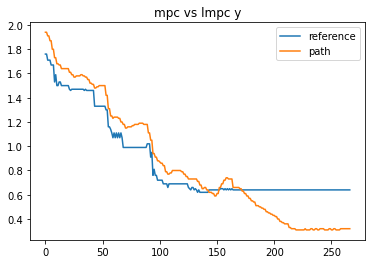

In [79]:
plt.plot(reference[:, 1], label="reference")
plt.plot(path[390:, 1], label="path")
plt.legend()
plt.title("mpc vs lmpc y")

Text(0.5, 1.0, 'errore theta')

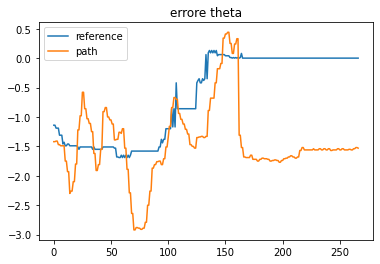

In [80]:
plt.plot(reference[:, 2], label="reference")
plt.plot(path[390:, 2], label="path")
plt.legend()
plt.title("errore theta")

In [81]:
from slackx1y1_noorientation import reference, path

In [82]:
path = np.array(path)
reference = np.array(reference)

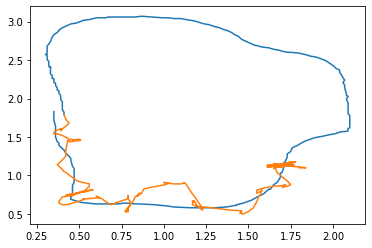

In [83]:
plt.plot(*path[:390, :2].T)
plt.plot(*path[390:, :2].T)

Text(0.5, 1.0, 'errore x')

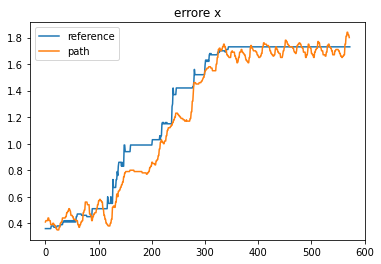

In [84]:
plt.plot(reference[:, 0], label="reference")
plt.plot(path[390:, 0], label="path")
plt.legend()
plt.title("errore x")

Text(0.5, 1.0, 'errore y')

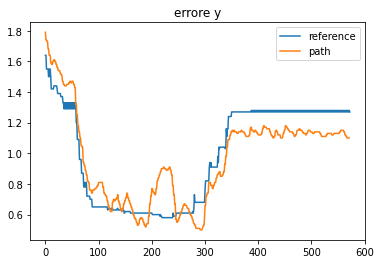

In [85]:
plt.plot(reference[:, 1], label="reference")
plt.plot(path[390:, 1], label="path")
plt.legend()
plt.title("errore y")

Text(0.5, 1.0, 'errore theta')

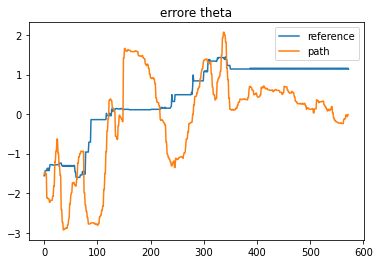

In [86]:
plt.plot(reference[:, 2], label="reference")
plt.plot(path[390:, 2], label="path")
plt.legend()
plt.title("errore theta")

In [87]:
from slack_x100_y100_noorientation import reference, path

In [88]:
path = np.array(path)
reference = np.array(reference)

(0.21549999999999997, 2.2945, 0.46399999999999997, 3.2359999999999998)

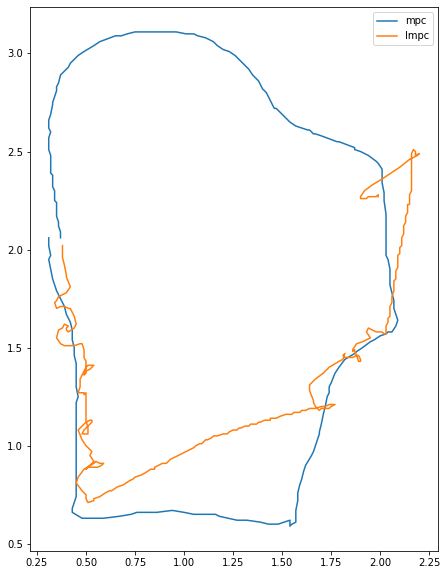

In [89]:
plt.plot(*path[:-644, :2].T, label="mpc")
plt.plot(*path[-644:, :2].T, label="lmpc")
plt.legend()

plt.gcf().set_size_inches(10, 10)
plt.axis('scaled')

Text(0.5, 1.0, 'errore x')

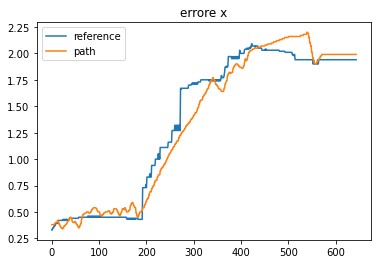

In [90]:
plt.plot(reference[:, 0], label="reference")
plt.plot(path[-644:, 0], label="path")
plt.legend()
plt.title("errore x")

Text(0.5, 1.0, 'errore y')

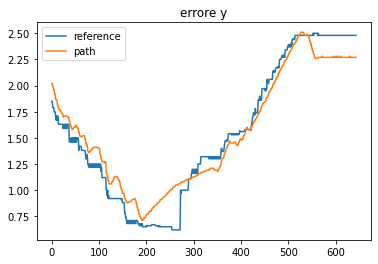

In [91]:
plt.plot(reference[:, 1], label="reference")
plt.plot(path[-644:, 1], label="path")
plt.legend()
plt.title("errore y")

Text(0.5, 1.0, 'errore theta')

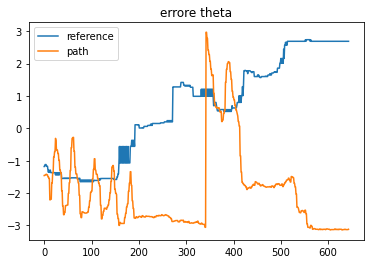

In [92]:
plt.plot(reference[:, 2], label="reference")
plt.plot(path[-644:, 2], label="path")
plt.legend()
plt.title("errore theta")

In [93]:
from slack_x1e3_y1e3_noorientation import reference, path

In [94]:
path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

(0.187, 2.233, 0.348, 3.2520000000000002)

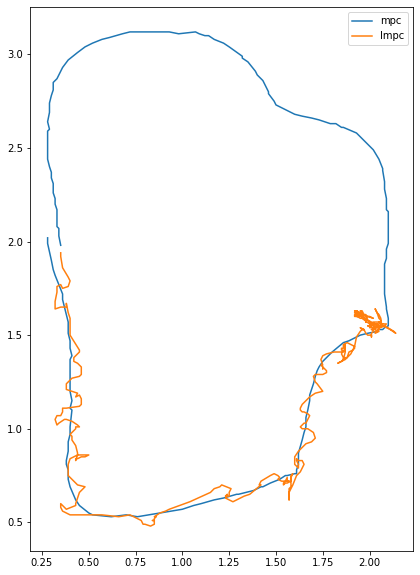

In [95]:
plt.plot(*path[:-length, :2].T, label="mpc")
plt.plot(*path[-length:, :2].T, label="lmpc")
plt.legend()
plt.gcf().set_size_inches(10, 10)
plt.axis('scaled')

Text(0.5, 1.0, 'Error on x')

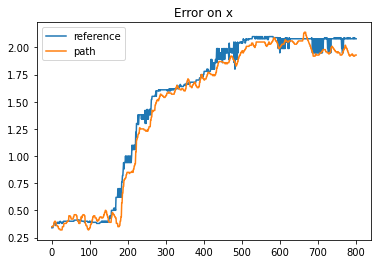

In [96]:
plt.plot(reference[:, 0], label="reference")
plt.plot(path[-length:, 0], label="path")
plt.legend()
plt.title("Error on x")

Text(0.5, 1.0, 'Error on y')

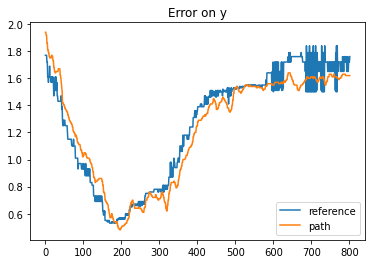

In [97]:
plt.plot(reference[:, 1], label="reference")
plt.plot(path[-length:, 1], label="path")
plt.legend()
plt.title("Error on y")

Text(0.5, 1.0, 'Error on theta')

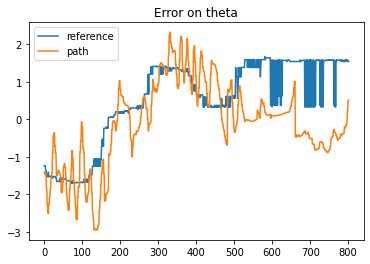

In [98]:
plt.plot(reference[:, 2], label="reference")
plt.plot(path[-length:, 2], label="path")
plt.legend()
plt.title("Error on theta")

In [99]:
from slack_x1e6_y1e6_noorientation import reference, path

In [100]:
path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

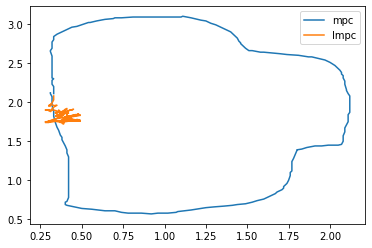

In [101]:
plt.plot(*path[:-length, :2].T, label="mpc")
plt.plot(*path[-length:, :2].T, label="lmpc")
plt.legend()

Text(0.5, 1.0, 'Error on x')

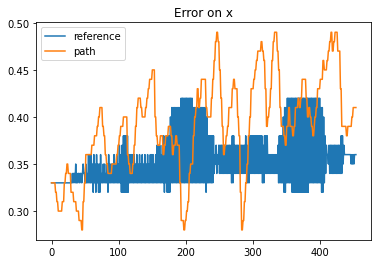

In [102]:
plt.plot(reference[:, 0], label="reference")
plt.plot(path[-length:, 0], label="path")
plt.legend()
plt.title("Error on x")

Text(0.5, 1.0, 'Error on y')

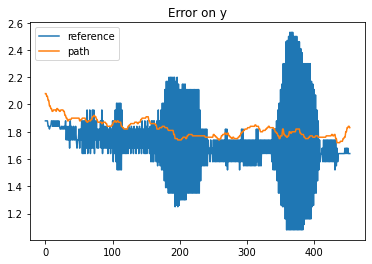

In [103]:
plt.plot(reference[:, 1], label="reference")
plt.plot(path[-length:, 1], label="path")
plt.legend()
plt.title("Error on y")

Text(0.5, 1.0, 'Error on theta')

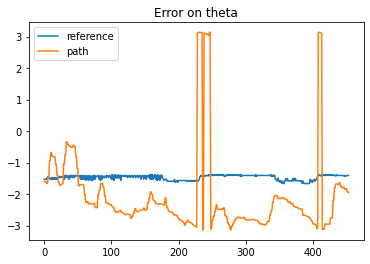

In [104]:
plt.plot(reference[:, 2], label="reference")
plt.plot(path[-length:, 2], label="path")
plt.legend()
plt.title("Error on theta")

In [105]:
from slack_x1e6_y1e6_noorientation_N10 import reference, path

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

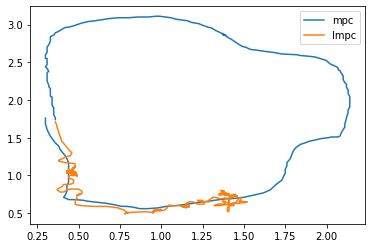

In [106]:
plt.plot(*path[:-length, :2].T, label="mpc")
plt.plot(*path[-length:, :2].T, label="lmpc")
plt.legend()

Text(0.5, 1.0, 'Error on x')

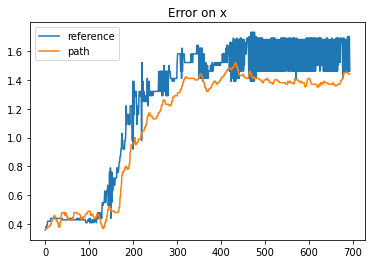

In [107]:
plt.plot(reference[:, 0], label="reference")
plt.plot(path[-length:, 0], label="path")
plt.legend()
plt.title("Error on x")

Text(0.5, 1.0, 'Error on y')

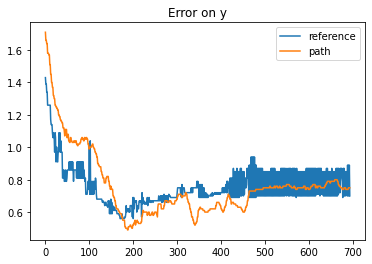

In [108]:
plt.plot(reference[:, 1], label="reference")
plt.plot(path[-length:, 1], label="path")
plt.legend()
plt.title("Error on y")

Text(0.5, 1.0, 'Error on theta')

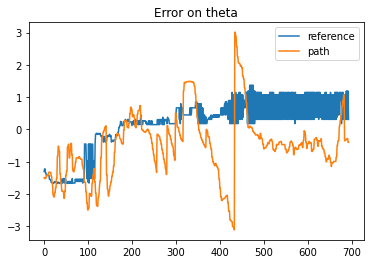

In [109]:
plt.plot(reference[:, 2], label="reference")
plt.plot(path[-length:, 2], label="path")
plt.legend()
plt.title("Error on theta")

In [110]:
from slack_x1e3_y1e3_noorientation_N1_k1 import reference, path

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

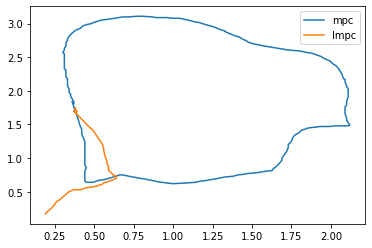

In [111]:
plt.plot(*path[:-length, :2].T, label="mpc")
plt.plot(*path[-length:, :2].T, label="lmpc")
plt.legend()

Text(0.5, 1.0, 'Error on x')

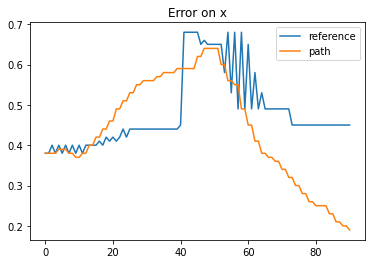

In [112]:
plt.plot(reference[:, 0], label="reference")
plt.plot(path[-length:, 0], label="path")
plt.legend()
plt.title("Error on x")

Text(0.5, 1.0, 'Error on y')

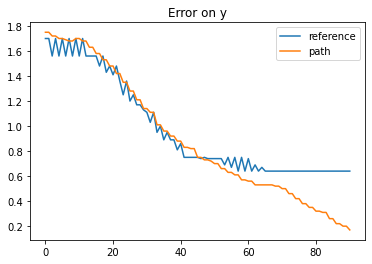

In [113]:
plt.plot(reference[:, 1], label="reference")
plt.plot(path[-length:, 1], label="path")
plt.legend()
plt.title("Error on y")

Text(0.5, 1.0, 'Error on theta')

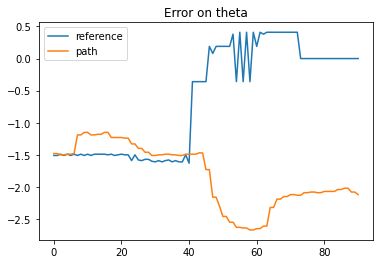

In [114]:
plt.plot(reference[:, 2], label="reference")
plt.plot(path[-length:, 2], label="path")
plt.legend()
plt.title("Error on theta")

In [115]:
from slack_x1e3_y1e3_N1_K1 import reference, path

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

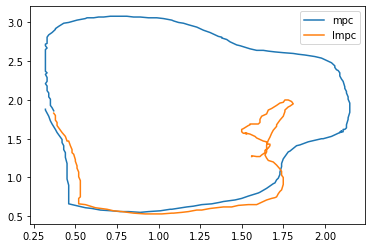

In [116]:
plt.plot(*path[:-length, :2].T, label="mpc")
plt.plot(*path[-length:, :2].T, label="lmpc")
plt.legend()

Text(0.5, 1.0, 'Error on x')

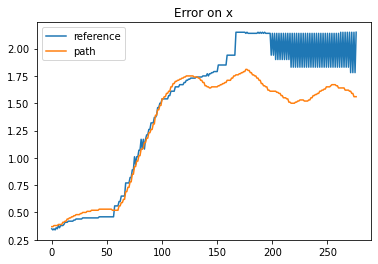

In [117]:
plt.plot(reference[:, 0], label="reference")
plt.plot(path[-length:, 0], label="path")
plt.legend()
plt.title("Error on x")

Text(0.5, 1.0, 'Error on y')

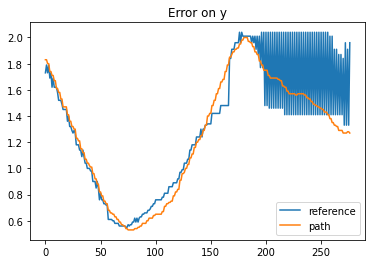

In [118]:
plt.plot(reference[:, 1], label="reference")
plt.plot(path[-length:, 1], label="path")
plt.legend()
plt.title("Error on y")

Text(0.5, 1.0, 'Error on theta')

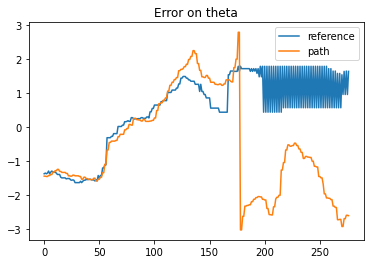

In [119]:
plt.plot(reference[:, 2], label="reference")
plt.plot(path[-length:, 2], label="path")
plt.legend()
plt.title("Error on theta")

In [120]:
from slack_x1e3_y1e3_t1e1_N1_k1_alpha08 import reference, path

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

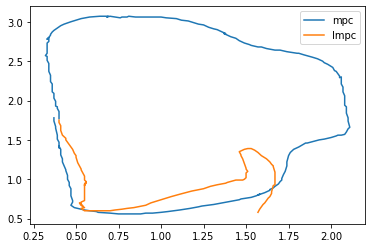

In [121]:
plt.plot(*path[:-length, :2].T, label="mpc")
plt.plot(*path[-length:, :2].T, label="lmpc")
plt.legend()

Text(0.5, 1.0, 'Error on x')

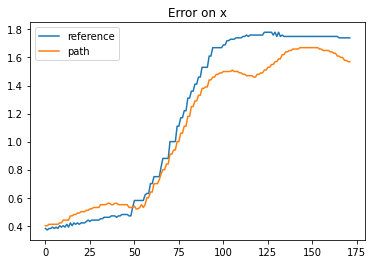

In [122]:
plt.plot(reference[:, 0], label="reference")
plt.plot(path[-length:, 0], label="path")
plt.legend()
plt.title("Error on x")

Text(0.5, 1.0, 'Error on y')

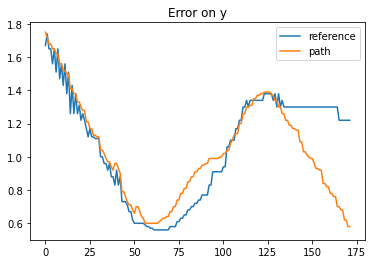

In [123]:
plt.plot(reference[:, 1], label="reference")
plt.plot(path[-length:, 1], label="path")
plt.legend()
plt.title("Error on y")

Text(0.5, 1.0, 'Error on theta')

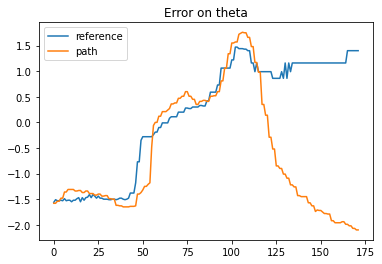

In [124]:
plt.plot(reference[:, 2], label="reference")
plt.plot(path[-length:, 2], label="path")
plt.legend()
plt.title("Error on theta")

In [125]:
reference_filtered = [reference[0]]
alpha = 0.4
for i in range(1,len(reference)):
    val = reference_filtered[-1]*(1-alpha) + reference[i]*alpha
    reference_filtered.append(val)
reference_filtered = np.array(reference_filtered)

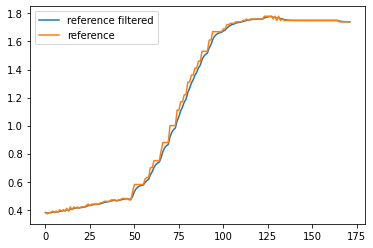

In [126]:
plt.plot(reference_filtered[:, 0], label="reference filtered")
plt.plot(reference[:, 0], label="reference")
plt.legend()

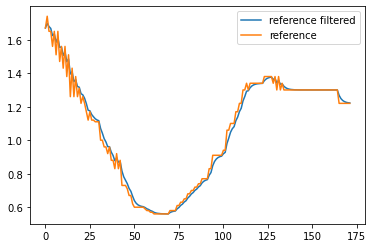

In [127]:
plt.plot(reference_filtered[:, 1], label="reference filtered")
plt.plot(reference[:, 1], label="reference")
plt.legend()

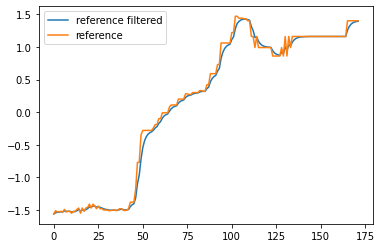

In [128]:
plt.plot(reference_filtered[:, 2], label="reference filtered")
plt.plot(reference[:, 2], label="reference")
plt.legend()

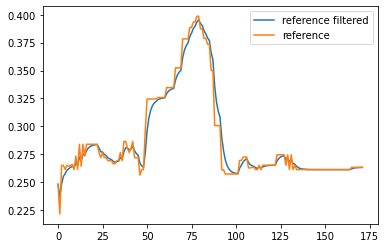

In [129]:
plt.plot(reference_filtered[:, 3], label="reference filtered")
plt.plot(reference[:, 3], label="reference")
plt.legend()

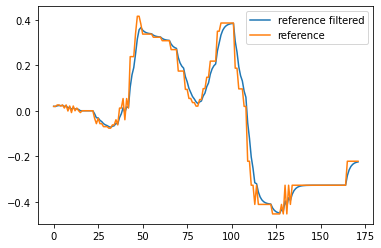

In [130]:
plt.plot(reference_filtered[:, 4], label="reference filtered")
plt.plot(reference[:, 4], label="reference")
plt.legend()

In [131]:
from noretro_Q21e_1_N3K2 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

(0.067, 2.333, 0.027499999999999997, 3.3825)

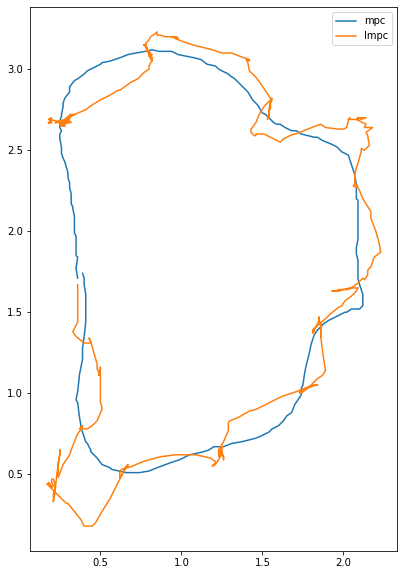

In [132]:
plt.plot(*path[:-length, :2].T, label="mpc")
plt.plot(*path[-length:, :2].T, label="lmpc")
plt.legend()
plt.gcf().set_size_inches(10, 10)
plt.axis('scaled')

In [133]:
from N1_K5_Q2_1e3_Q3_1 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

In [134]:
from N1_K1_Q2_1_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["A"].plot(*path[:-length, :2].T, label="mpc")
axs["A"].plot(*path[-length:, :2].T, label="lmpc")
axs["A"].legend()
# axs["A"].gcf().set_size_inches(10, 10)
axs["A"].axis('scaled')
axs["A"].set_title('N 1, K 1, Q2 1')

NameError: name 'axs' is not defined

In [ ]:
from N1_K5_Q2_1_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["B"].plot(*path[:-length, :2].T, label="mpc")
axs["B"].plot(*path[-length:, :2].T, label="lmpc")
axs["B"].legend()
# axs["A"].gcf().set_size_inches(10, 10)
axs["B"].axis('scaled')
axs["B"].set_title('N 1, K 5, Q2 1')

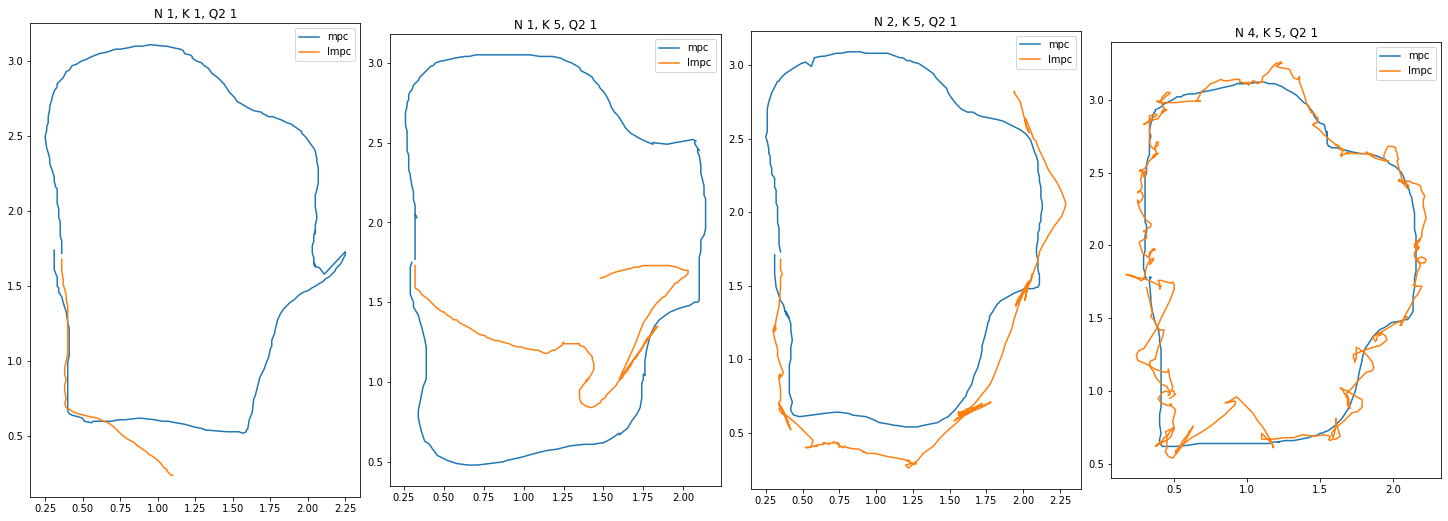

In [ ]:
fig, axs = plt.subplot_mosaic([
    ['A', 'B', 'C', 'D']
], layout='constrained', figsize=(20, 20))

from N1_K1_Q2_1_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["A"].plot(*path[:-length, :2].T, label="mpc")
axs["A"].plot(*path[-length:, :2].T, label="lmpc")
axs["A"].legend()
axs["A"].axis('scaled')
axs["A"].set_title('N 1, K 1, Q2 1')

from N1_K5_Q2_1_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["B"].plot(*path[:-length, :2].T, label="mpc")
axs["B"].plot(*path[-length:, :2].T, label="lmpc")
axs["B"].legend()
# axs["A"].gcf().set_size_inches(10, 10)
axs["B"].axis('scaled')
axs["B"].set_title('N 1, K 5, Q2 1')

from N2_K5_Q2_1_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["C"].plot(*path[:-length, :2].T, label="mpc")
axs["C"].plot(*path[-length:, :2].T, label="lmpc")
axs["C"].legend()
# axs["A"].gcf().set_size_inches(10, 10)
axs["C"].axis('scaled')
axs["C"].set_title('N 2, K 5, Q2 1')

from N4_K5_Q2_1_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["D"].plot(*path[:-length, :2].T, label="mpc")
axs["D"].plot(*path[-length:, :2].T, label="lmpc")
axs["D"].legend()
# axs["A"].gcf().set_size_inches(10, 10)
axs["D"].axis('scaled')
axs["D"].set_title('N 4, K 5, Q2 1')

plt.show()

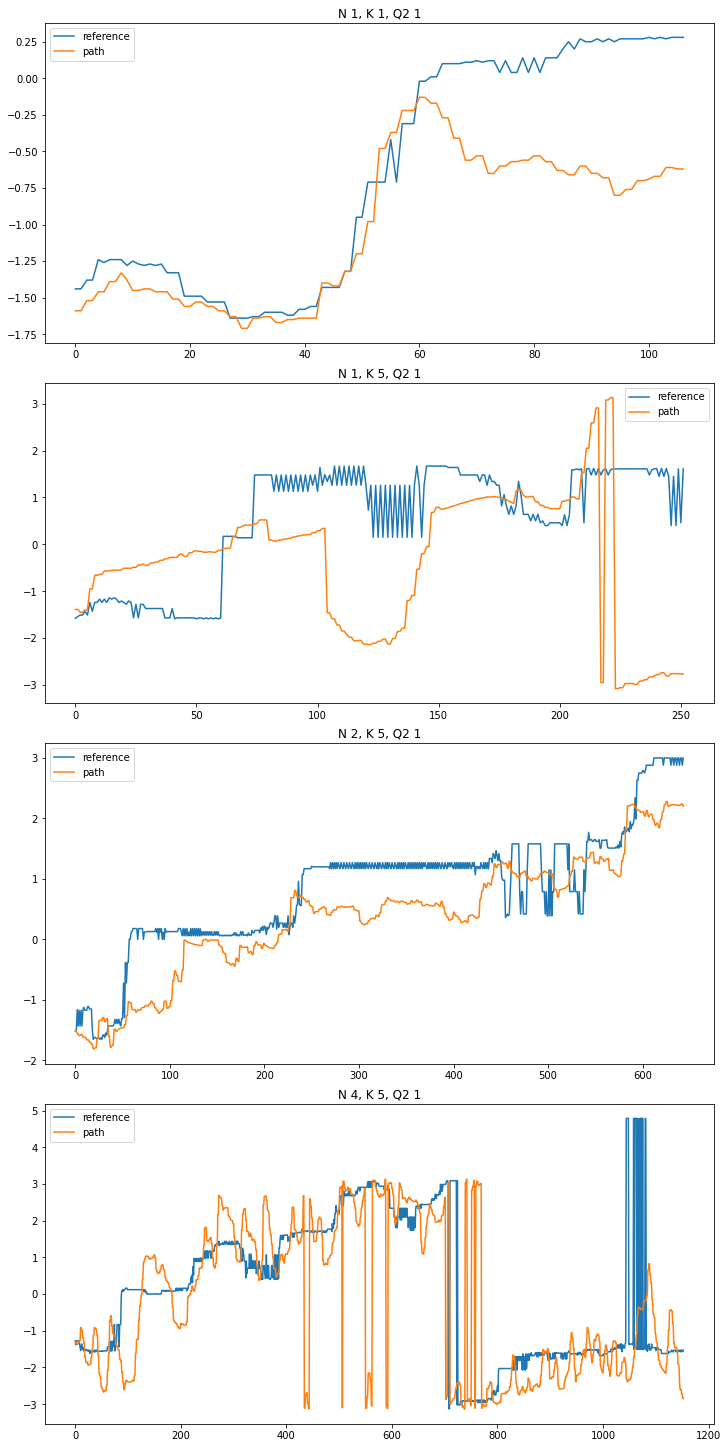

In [ ]:
fig, axs = plt.subplot_mosaic([
    ['At'],
    ['Bt'],
    ['Ct'],
    ['Dt']
], layout='constrained', figsize=(10, 20))

from N1_K1_Q2_1_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["At"].plot(reference[:, 2], label="reference")
axs["At"].plot(path[-length:, 2], label="path")
axs["At"].legend()
axs["At"].set_title('N 1, K 1, Q2 1')

from N1_K5_Q2_1_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["Bt"].plot(reference[:, 2], label="reference")
axs["Bt"].plot(path[-length:, 2], label="path")
axs["Bt"].legend()
axs["Bt"].set_title('N 1, K 5, Q2 1')

from N2_K5_Q2_1_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["Ct"].plot(reference[:, 2], label="reference")
axs["Ct"].plot(path[-length:, 2], label="path")
axs["Ct"].legend()
axs["Ct"].set_title('N 2, K 5, Q2 1')

from N4_K5_Q2_1_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["Dt"].plot(reference[:, 2], label="reference")
axs["Dt"].plot(path[-length:, 2], label="path")
axs["Dt"].legend()
axs["Dt"].set_title('N 4, K 5, Q2 1')

plt.show()

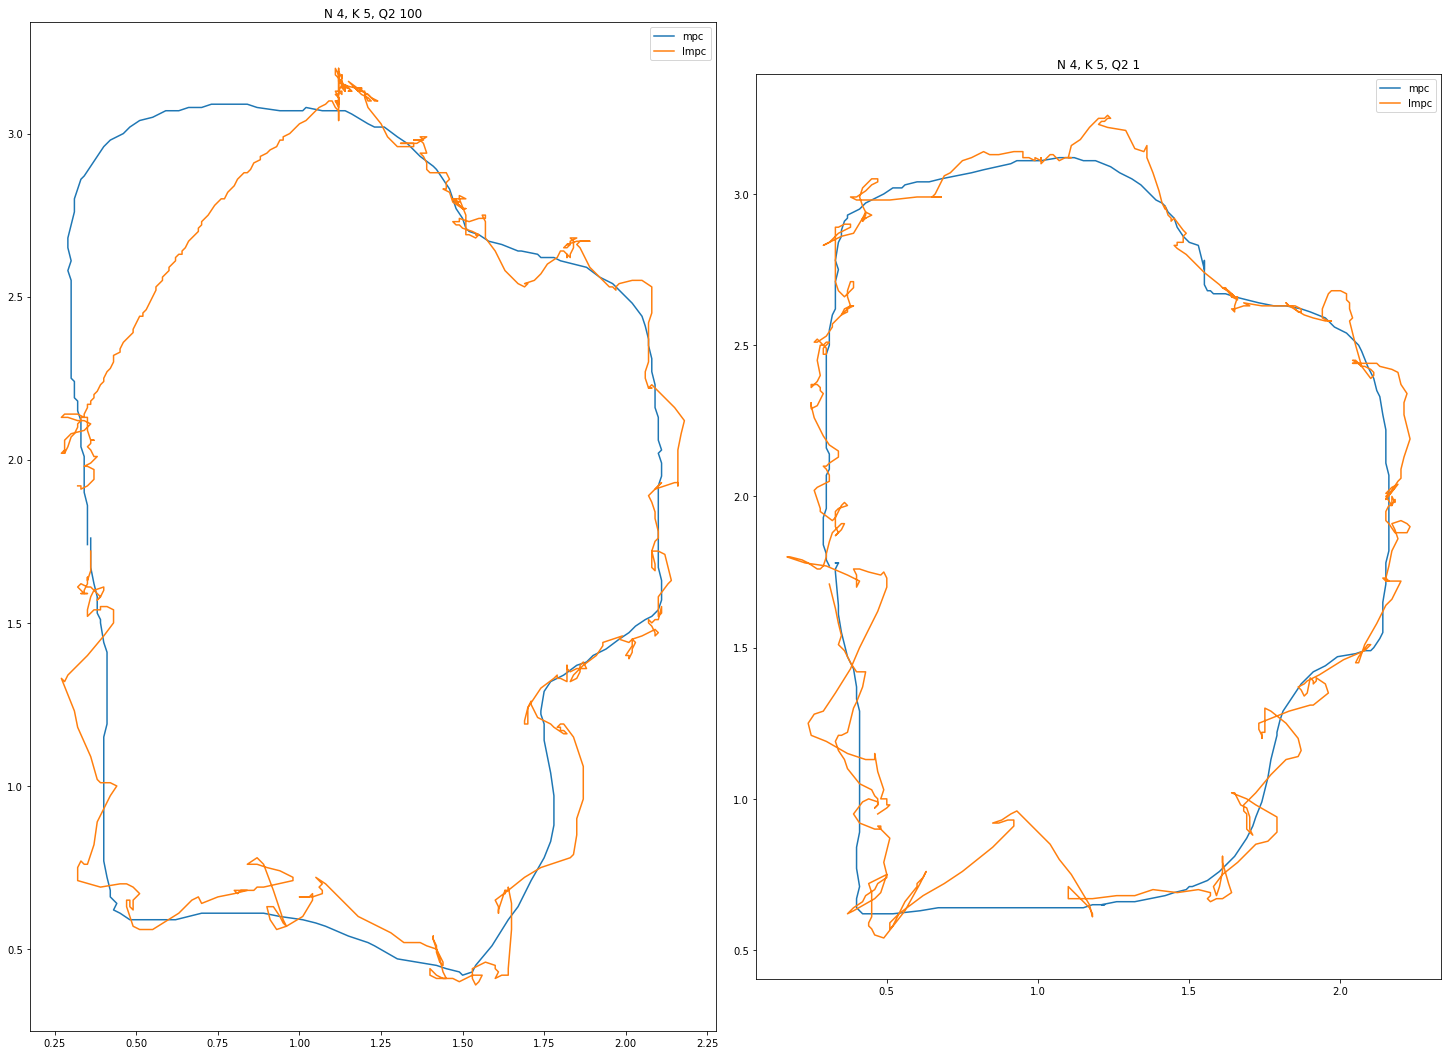

In [ ]:
fig, axs = plt.subplot_mosaic([
    ['A', 'D']
], layout='constrained', figsize=(20, 20))

from N4_K5_Q2_1e2_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["A"].plot(*path[:-length, :2].T, label="mpc")
axs["A"].plot(*path[-length:, :2].T, label="lmpc")
axs["A"].legend()
axs["A"].axis('scaled')
axs["A"].set_title('N 4, K 5, Q2 100')

from N4_K5_Q2_1_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["D"].plot(*path[:-length, :2].T, label="mpc")
axs["D"].plot(*path[-length:, :2].T, label="lmpc")
axs["D"].legend()
axs["D"].axis('scaled')
axs["D"].set_title('N 4, K 5, Q2 1')

plt.show()

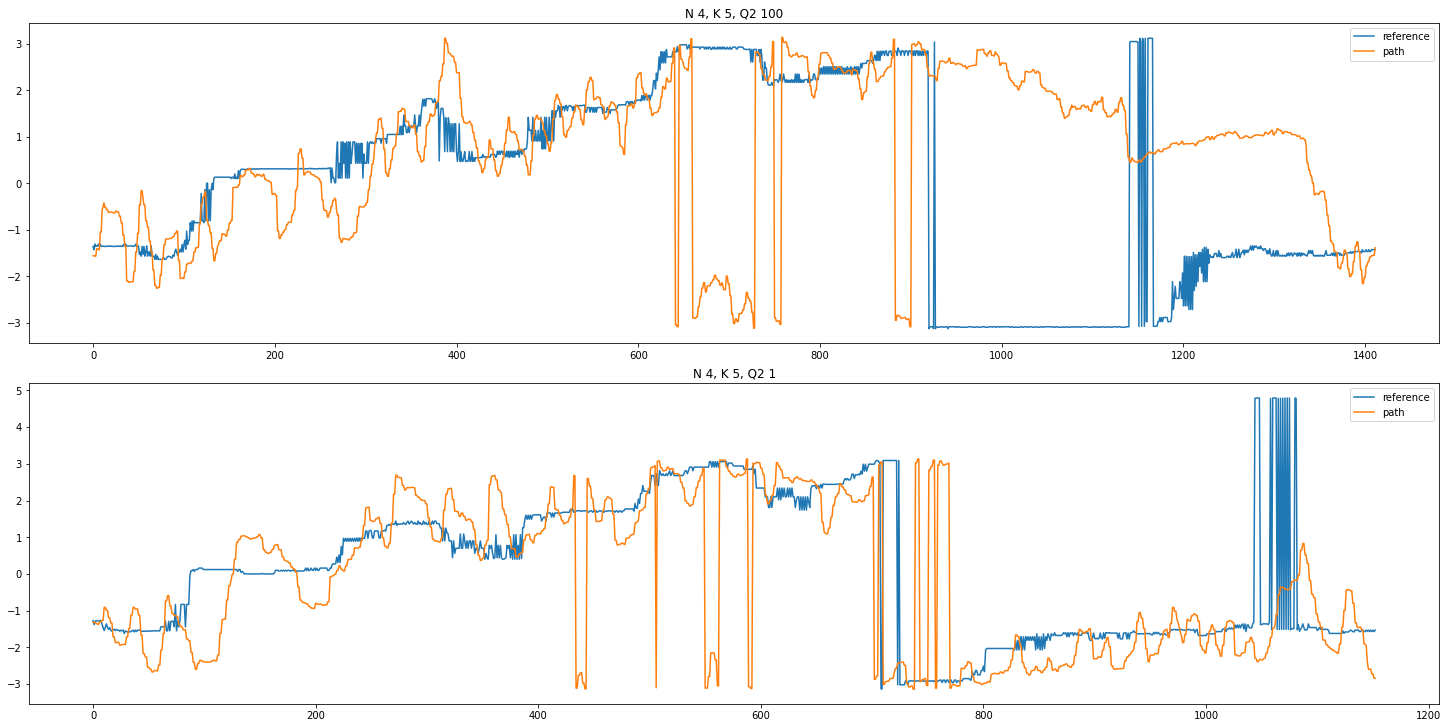

In [ ]:
fig, axs = plt.subplot_mosaic([
    ['A'],
    ['D']
], layout='constrained', figsize=(20, 10))

from N4_K5_Q2_1e2_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["A"].plot(reference[:, 2], label="reference")
axs["A"].plot(path[-length:, 2], label="path")
axs["A"].legend()
axs["A"].set_title('N 4, K 5, Q2 100')

from N4_K5_Q2_1_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["D"].plot(reference[:, 2], label="reference")
axs["D"].plot(path[-length:, 2], label="path")
axs["D"].legend()
axs["D"].set_title('N 4, K 5, Q2 1')

plt.show()

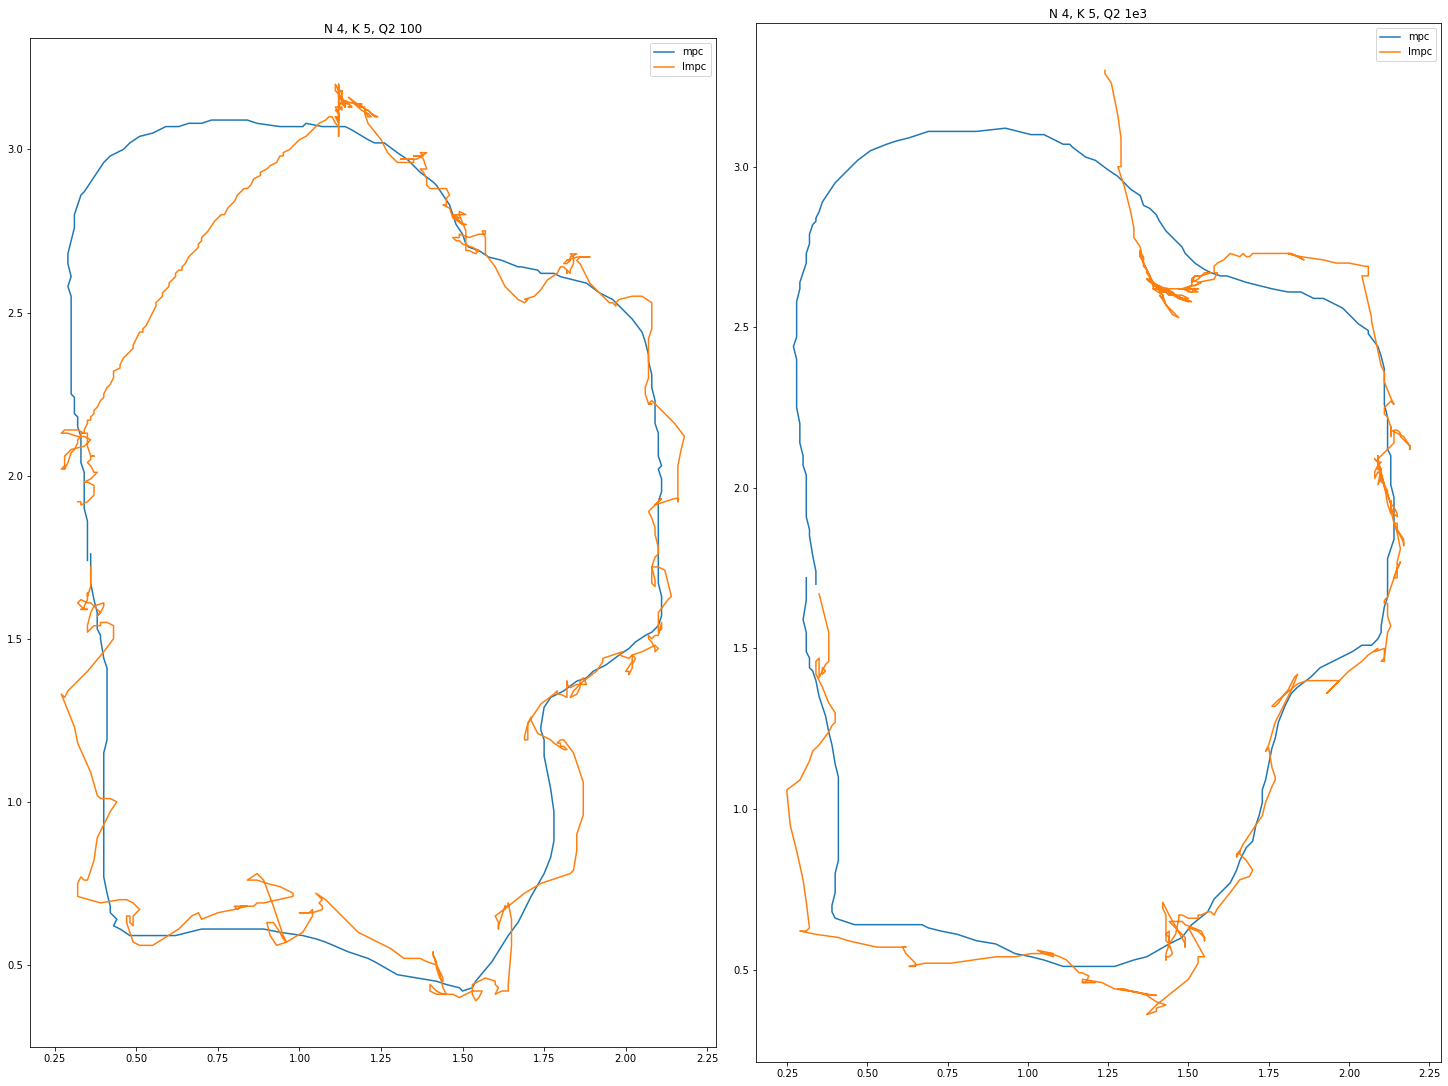

In [ ]:
fig, axs = plt.subplot_mosaic([
    ['A', 'D']
], layout='constrained', figsize=(20, 20))

from N4_K5_Q2_1e2_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["A"].plot(*path[:-length, :2].T, label="mpc")
axs["A"].plot(*path[-length:, :2].T, label="lmpc")
axs["A"].legend()
axs["A"].axis('scaled')
axs["A"].set_title('N 4, K 5, Q2 100')

from N4_K5_Q2_1e3_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["D"].plot(*path[:-length, :2].T, label="mpc")
axs["D"].plot(*path[-length:, :2].T, label="lmpc")
axs["D"].legend()
axs["D"].axis('scaled')
axs["D"].set_title('N 4, K 5, Q2 1e3')

plt.show()

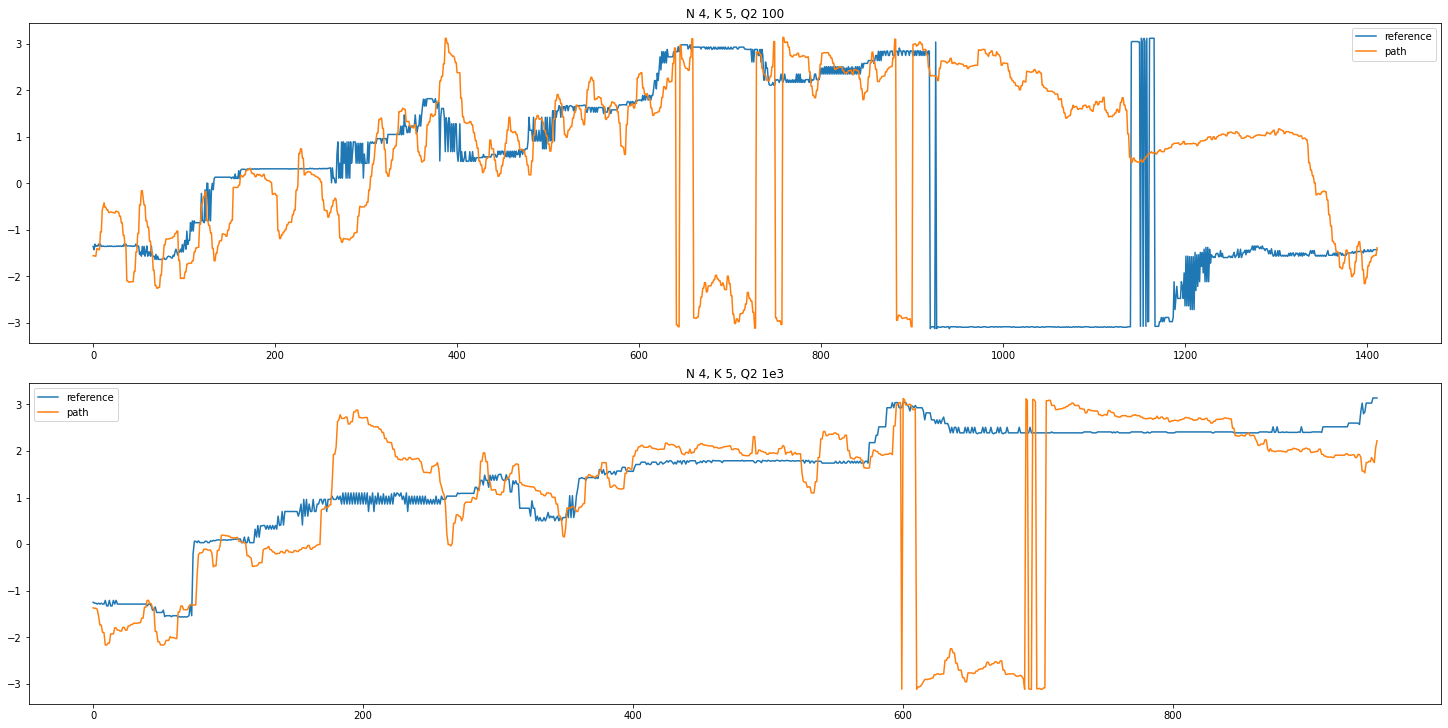

In [ ]:
fig, axs = plt.subplot_mosaic([
    ['A'],
    ['D']
], layout='constrained', figsize=(20, 10))

from N4_K5_Q2_1e2_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["A"].plot(reference[:, 2], label="reference")
axs["A"].plot(path[-length:, 2], label="path")
axs["A"].legend()
axs["A"].set_title('N 4, K 5, Q2 100')

from N4_K5_Q2_1e3_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["D"].plot(reference[:, 2], label="reference")
axs["D"].plot(path[-length:, 2], label="path")
axs["D"].legend()
axs["D"].set_title('N 4, K 5, Q2 1e3')

plt.show()

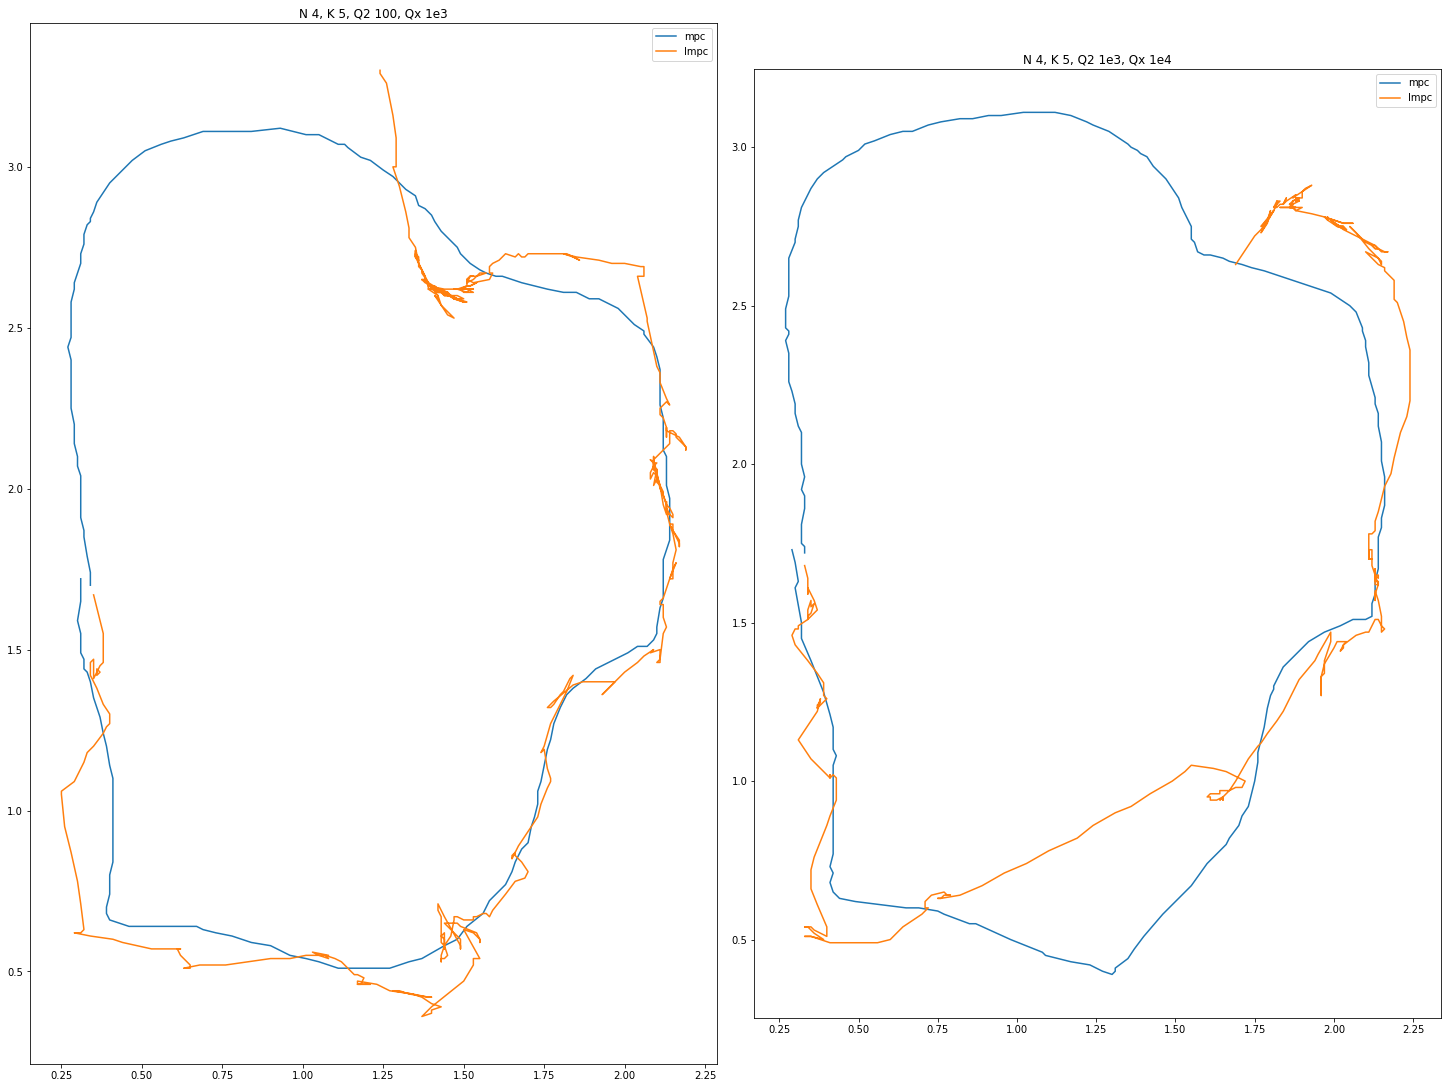

In [ ]:
fig, axs = plt.subplot_mosaic([
    ['A', 'D']
], layout='constrained', figsize=(20, 20))

from N4_K5_Q2_1e3_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["A"].plot(*path[:-length, :2].T, label="mpc")
axs["A"].plot(*path[-length:, :2].T, label="lmpc")
axs["A"].legend()
axs["A"].axis('scaled')
axs["A"].set_title('N 4, K 5, Q2 100, Qx 1e3')

from N4_K5_Q2_1e3_Qx_1e4 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["D"].plot(*path[:-length, :2].T, label="mpc")
axs["D"].plot(*path[-length:, :2].T, label="lmpc")
axs["D"].legend()
axs["D"].axis('scaled')
axs["D"].set_title('N 4, K 5, Q2 1e3, Qx 1e4')

plt.show()

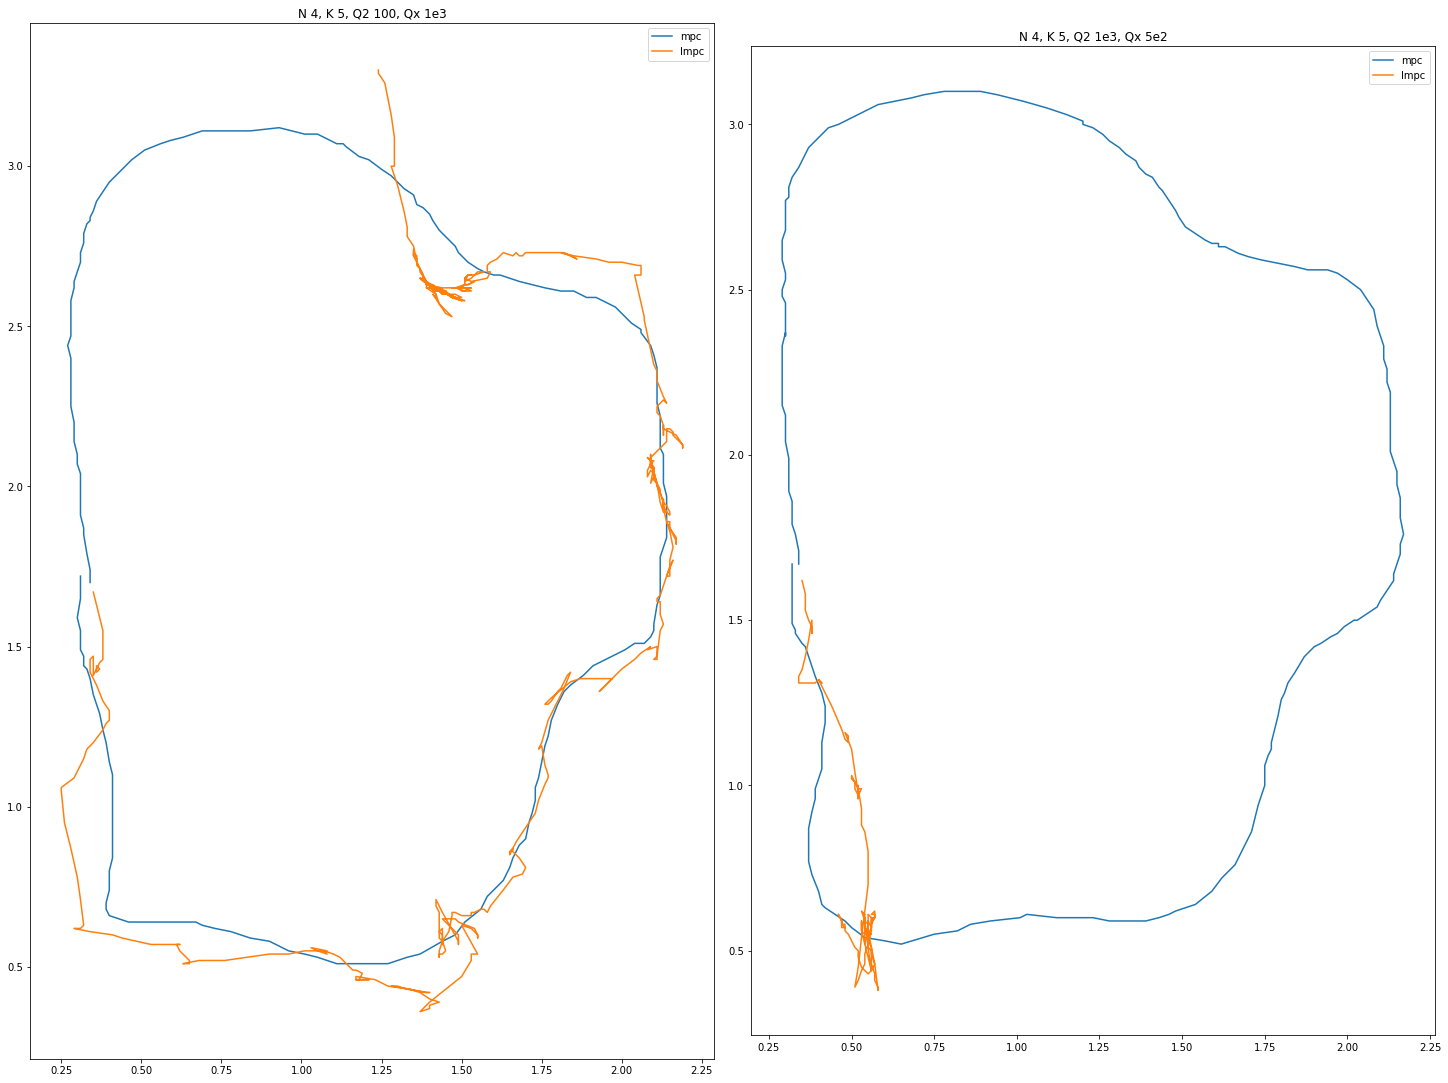

In [ ]:
fig, axs = plt.subplot_mosaic([
    ['A', 'D']
], layout='constrained', figsize=(20, 20))

from N4_K5_Q2_1e3_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["A"].plot(*path[:-length, :2].T, label="mpc")
axs["A"].plot(*path[-length:, :2].T, label="lmpc")
axs["A"].legend()
axs["A"].axis('scaled')
axs["A"].set_title('N 4, K 5, Q2 100, Qx 1e3')

from N4_K5_Q2_1e3_Qx_5e2 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["D"].plot(*path[:-length, :2].T, label="mpc")
axs["D"].plot(*path[-length:, :2].T, label="lmpc")
axs["D"].legend()
axs["D"].axis('scaled')
axs["D"].set_title('N 4, K 5, Q2 1e3, Qx 5e2')

plt.show()

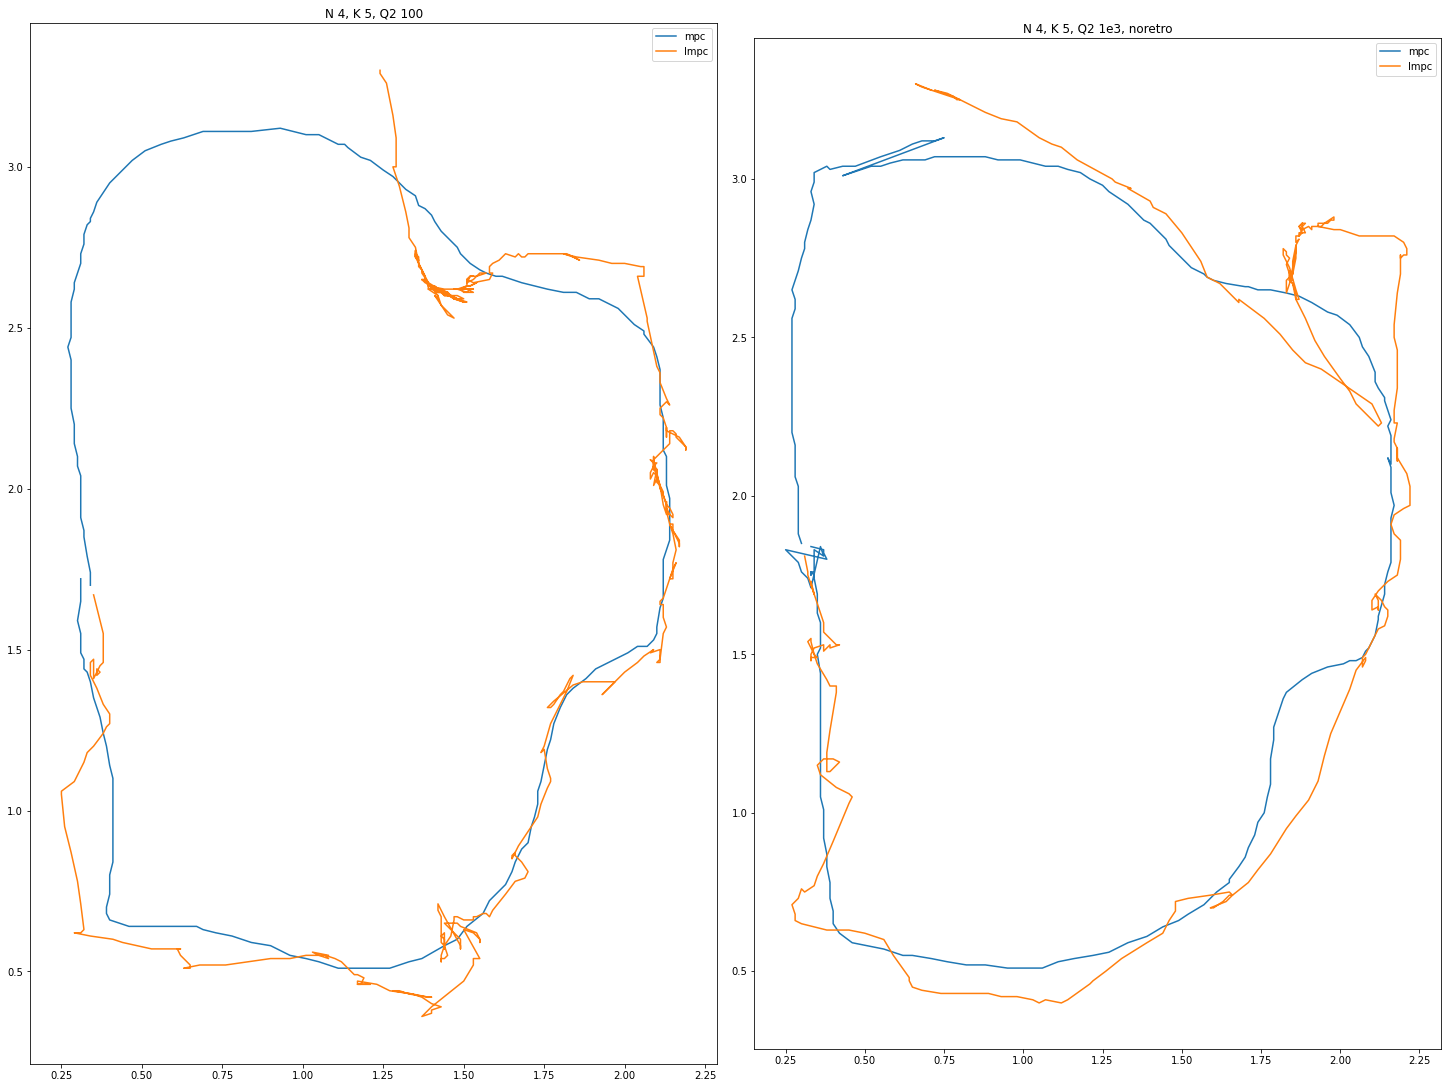

In [ ]:
fig, axs = plt.subplot_mosaic([
    ['A', 'D']
], layout='constrained', figsize=(20, 20))

from N4_K5_Q2_1e3_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["A"].plot(*path[:-length, :2].T, label="mpc")
axs["A"].plot(*path[-length:, :2].T, label="lmpc")
axs["A"].legend()
axs["A"].axis('scaled')
axs["A"].set_title('N 4, K 5, Q2 100')

from N4_K5_Q2_100_Q3_5_noretro import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["D"].plot(*path[:-length, :2].T, label="mpc")
axs["D"].plot(*path[-length:, :2].T, label="lmpc")
axs["D"].legend()
axs["D"].axis('scaled')
axs["D"].set_title('N 4, K 5, Q2 1e3, noretro')

plt.show()

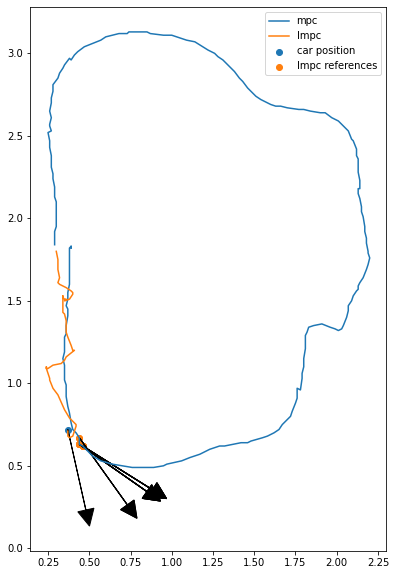

In [ ]:
from loop_with_references import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

distance = 93

fig, ax = plt.subplots()

ax.plot(*path[:-length, :2].T, label="mpc")
ax.plot(*path[-length:-length+distance, :2].T, label="lmpc")
x, y, theta = path[-length+distance, :3].T
ax.scatter(x, y, label="car position")
dx = np.cos(theta)*0.5
dy = np.sin(theta)*0.5
ax.arrow(x, y, dx, dy, head_width=0.1, head_length=0.1, fc='k', ec='k')
# plt.scatter(*reference[50, :2, :], label="lmpc references")
points = reference[distance, :3, :].T
ax.scatter(points[:,0], points[:,1], label="lmpc references")

# Add arrows for orientation
for x, y, theta in points:
    dx = np.cos(theta)*0.5
    dy = np.sin(theta)*0.5
    ax.arrow(x, y, dx, dy, head_width=0.1, head_length=0.1, fc='k', ec='k')

# Show plot
ax.legend()
ax.axis('scaled')
fig.set_size_inches(10, 10)
plt.show()

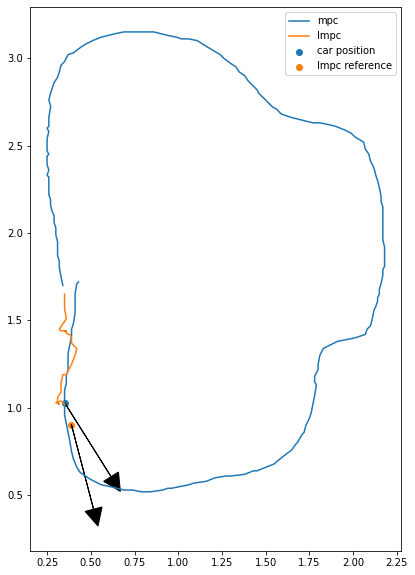

In [149]:
from loop_with_reference_point import path, reference, chosen_ref

path = np.array(path)
reference = np.array(reference)
chosen_ref = np.array(chosen_ref)
length = reference.shape[0]

distance = 69

fig, ax = plt.subplots()

ax.plot(*path[:-length, :2].T, label="mpc")
ax.plot(*path[-length:-length+distance, :2].T, label="lmpc")
x, y, theta = path[-length+distance, :3].T
ax.scatter(x, y, label="car position")
dx = np.cos(theta)*0.5
dy = np.sin(theta)*0.5
ax.arrow(x, y, dx, dy, head_width=0.1, head_length=0.1, fc='k', ec='k')
# plt.scatter(*reference[50, :2, :], label="lmpc references")
points = chosen_ref[distance, :3].T
ax.scatter(points[:,0], points[:,1], label="lmpc reference")

# Add arrows for orientation
for x, y, theta in points:
    dx = np.cos(theta)*0.5
    dy = np.sin(theta)*0.5
    ax.arrow(x, y, dx, dy, head_width=0.1, head_length=0.1, fc='k', ec='k')

# Show plot
ax.legend()
ax.axis('scaled')
fig.set_size_inches(10, 10)
plt.show()

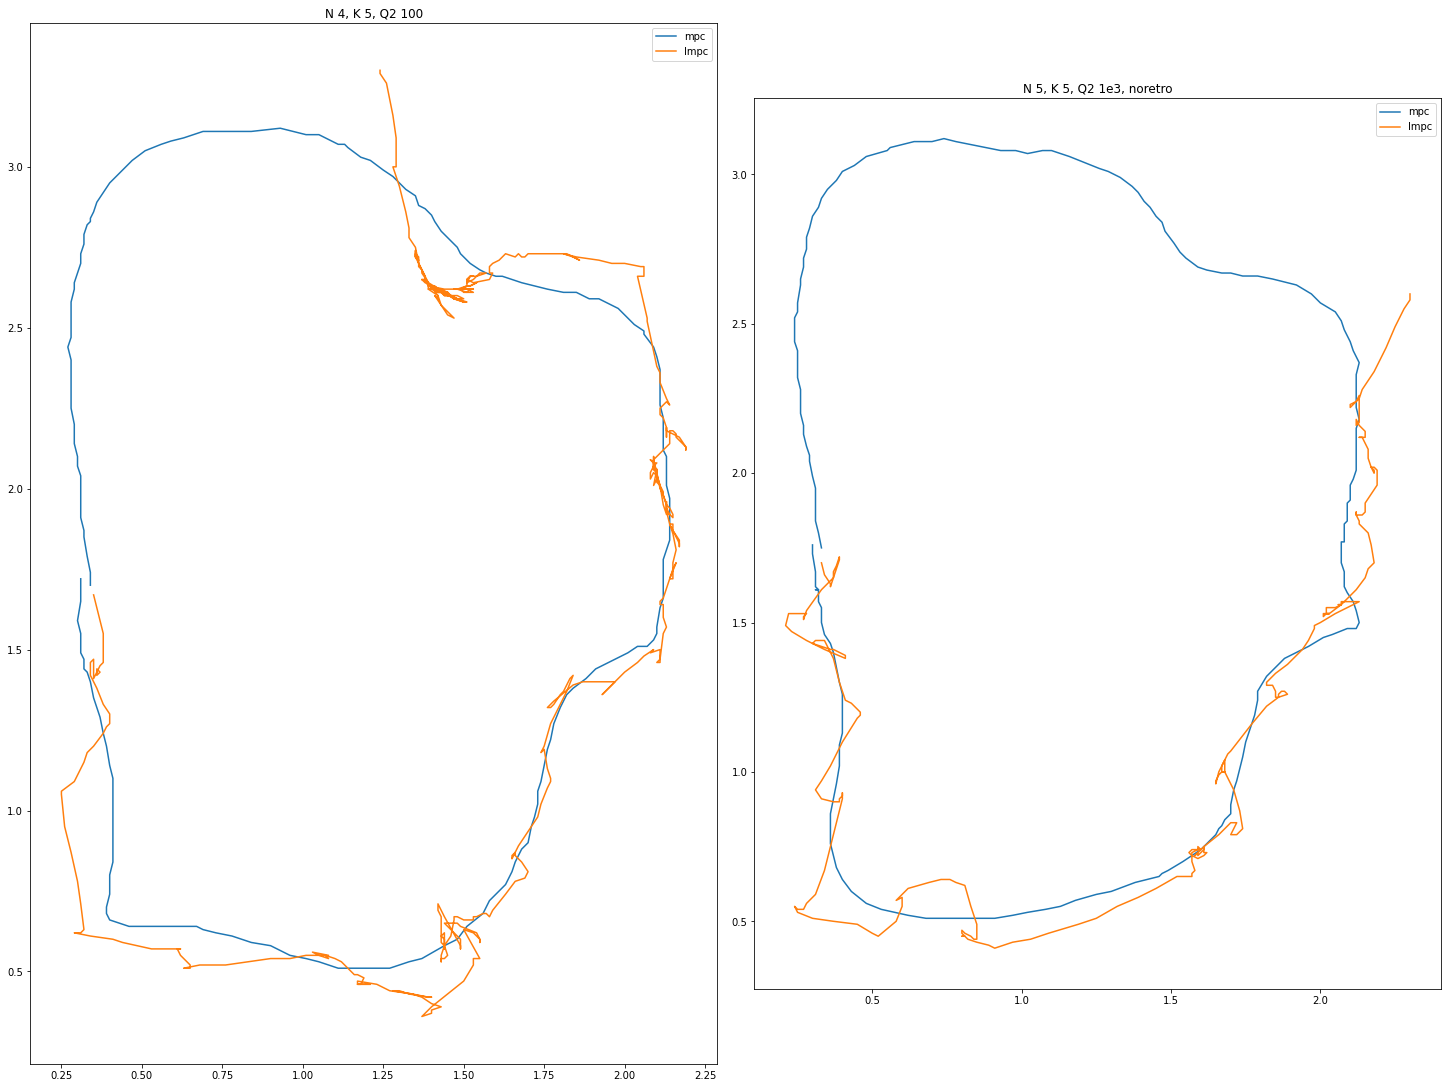

In [151]:
fig, axs = plt.subplot_mosaic([
    ['A', 'D']
], layout='constrained', figsize=(20, 20))

from N4_K5_Q2_1e3_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["A"].plot(*path[:-length, :2].T, label="mpc")
axs["A"].plot(*path[-length:, :2].T, label="lmpc")
axs["A"].legend()
axs["A"].axis('scaled')
axs["A"].set_title('N 4, K 5, Q2 100')

from N5_K5_Q2_1e3 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["D"].plot(*path[:-length, :2].T, label="mpc")
axs["D"].plot(*path[-length:, :2].T, label="lmpc")
axs["D"].legend()
axs["D"].axis('scaled')
axs["D"].set_title('N 5, K 5, Q2 1e3, noretro')

plt.show()

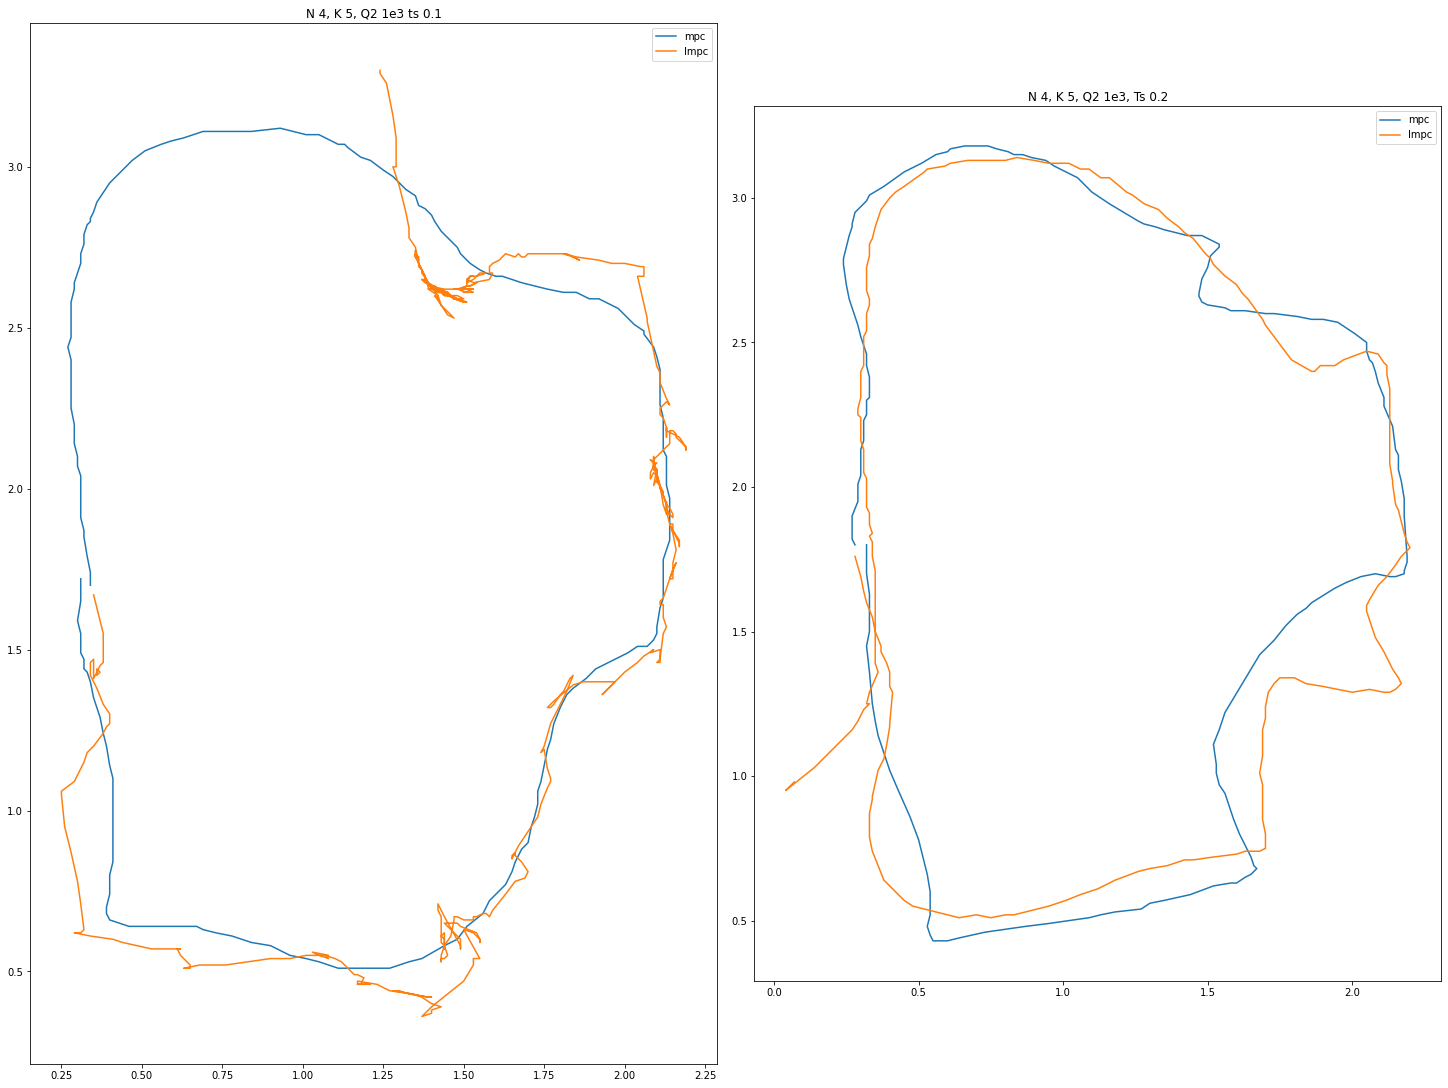

In [161]:
fig, axs = plt.subplot_mosaic([
    ['A', 'D']
], layout='constrained', figsize=(20, 20))

from N4_K5_Q2_1e3_Q3_0 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["A"].plot(*path[:-length, :2].T, label="mpc")
axs["A"].plot(*path[-length:, :2].T, label="lmpc")
axs["A"].legend()
axs["A"].axis('scaled')
axs["A"].set_title('N 4, K 5, Q2 1e3 ts 0.1')

from N4_K5_Ts02 import path, reference

path = np.array(path)
reference = np.array(reference)
length = reference.shape[0]

axs["D"].plot(*path[:185, :2].T, label="mpc")
axs["D"].plot(*path[185:, :2].T, label="lmpc")
axs["D"].legend()
axs["D"].axis('scaled')
axs["D"].set_title('N 4, K 5, Q2 1e3, Ts 0.2')

plt.show()